In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
# read dataset into dataFrame, overview of dataset
strokeData = pd.read_csv("..\..\data\\raw\strokeDataset.csv")
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# count null values
strokeData['bmi'].isna().sum()

201

0    4861
1     249
Name: stroke, dtype: int64

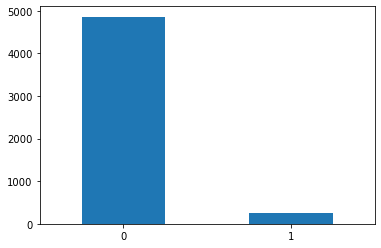

In [4]:
# count number of stroke occurrence
strokeCount = strokeData['stroke'].value_counts()

# display stroke counts in graphical format
strokeCount.plot(kind='bar', rot=0)
strokeCount

In [5]:
# summary of dataset
strokeData.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# removing duplicates from dataset
strokeData.drop_duplicates(subset='id', keep=False, inplace=True)

In [8]:
strokeData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
# replace NaN bmi values with bmi mean
strokeData['bmi'].fillna(value=strokeData['bmi'].mean(), inplace=True)
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
# check gender type & count
strokeData['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [11]:
strokeData['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
# replace 'others' in gender to 'male'
strokeData = strokeData.replace(to_replace='Other', value='Male')
strokeData.head()
strokeData['gender'].describe()

count       5110
unique         2
top       Female
freq        2994
Name: gender, dtype: object

In [13]:
strokeData['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [14]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [15]:
# create instance for OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [16]:
# extract 'id' and 'gender' columns to transform and rename new columns
# extract 'id' so that its 2D array for encoder to work
stroke_gender = strokeData[['id','gender']]
stroke_gender.head()

,id,gender
0,9046,Male
1,51676,Female
2,31112,Male
3,60182,Female
4,1665,Female


In [17]:
# transform 'gender' into numeric type
stroke_gender_transformed = pd.DataFrame(enc.fit_transform(stroke_gender[['gender']]))

# rename transformed 'gender' cols
stroke_gender_transformed.columns = enc.get_feature_names(['gender'])
print(stroke_gender_transformed.shape)
stroke_gender_transformed.head()

(5110, 2)


,gender_Female,gender_Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [18]:
# extract 'id' and 'ever_married' to transform and rename the columns
stroke_married = strokeData[['id', 'ever_married']]
stroke_married.head()

,id,ever_married
0,9046,Yes
1,51676,Yes
2,31112,Yes
3,60182,Yes
4,1665,Yes


In [19]:
# transform 'ever_married' into numeric type
stroke_married_transformed = pd.DataFrame(enc.fit_transform(stroke_married[['ever_married']]))

# rename transformed 'ever_married' cols
stroke_married_transformed.columns = enc.get_feature_names(['married'])
print(stroke_married_transformed.shape)
stroke_married_transformed.head()

(5110, 2)


,married_No,married_Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [20]:
# extract 'id' and 'work_type' to transform and rename the columns
stroke_work = strokeData[['id', 'work_type']]
stroke_work.head()

,id,work_type
0,9046,Private
1,51676,Self-employed
2,31112,Private
3,60182,Private
4,1665,Self-employed


In [21]:
# transform 'work_type' into numeric type
stroke_work_transformed = pd.DataFrame(enc.fit_transform(stroke_work[['work_type']]))

# rename transformed 'work_type' cols
stroke_work_transformed.columns = enc.get_feature_names(['work'])
print(stroke_work_transformed.shape)
stroke_work_transformed.head()

(5110, 5)


,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [22]:
# extract 'id' and 'Residence_type' to transform and rename the columns
stroke_residence = strokeData[['id', 'Residence_type']]
stroke_residence.head()

,id,Residence_type
0,9046,Urban
1,51676,Rural
2,31112,Rural
3,60182,Urban
4,1665,Rural


In [23]:
# transform 'Residence_type' into numeric type
stroke_residence_transformed = pd.DataFrame(enc.fit_transform(strokeData[['Residence_type']]))

# rename transformed 'Residence_type' cols
stroke_residence_transformed.columns = enc.get_feature_names(['residence'])
print(stroke_residence_transformed.shape)
stroke_residence_transformed.head()

(5110, 2)


,residence_Rural,residence_Urban
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [24]:
# extract 'id' and 'smoking_status' to transform and rename the columns
stroke_smoker = strokeData[['id', 'smoking_status']]
stroke_smoker.head()

,id,smoking_status
0,9046,formerly smoked
1,51676,never smoked
2,31112,never smoked
3,60182,smokes
4,1665,never smoked


In [25]:
# transform 'smoking_status' into numeric type
stroke_smoker_transformed = pd.DataFrame(enc.fit_transform(strokeData[['smoking_status']]))

# rename transformed 'smoking_status' cols
stroke_smoker_transformed.columns = enc.get_feature_names(['smoke'])
print(stroke_smoker_transformed.shape)
stroke_smoker_transformed.head()

(5110, 4)


,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [26]:
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [27]:
# concatenate the transformed columns
strokeData_transformed = pd.concat([strokeData, stroke_gender_transformed, stroke_married_transformed, stroke_work_transformed, stroke_residence_transformed, stroke_smoker_transformed], axis=1)
strokeData_transformed.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
strokeData_transformed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,married_No,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,67.0,0,1,228.69,36.600000,formerly smoked,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,never smoked,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,never smoked,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,smokes,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,never smoked,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
strokeData_cleaned = strokeData_transformed

In [29]:
strokeData_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
strokeData_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5110 non-null   int64  
 1   gender                 5110 non-null   object 
 2   age                    5110 non-null   float64
 3   hypertension           5110 non-null   int64  
 4   heart_disease          5110 non-null   int64  
 5   ever_married           5110 non-null   object 
 6   work_type              5110 non-null   object 
 7   Residence_type         5110 non-null   object 
 8   avg_glucose_level      5110 non-null   float64
 9   bmi                    5110 non-null   float64
 10  smoking_status         5110 non-null   object 
 11  stroke                 5110 non-null   int64  
 12  gender_Female          5110 non-null   float64
 13  gender_Male            5110 non-null   float64
 14  married_No             5110 non-null   float64
 15  marr